In [67]:
#importing Library files into the program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# Selecting the Directory or DataSet Path 
data=pd.read_csv('../input/mall-customer/Mall_Customers.csv')

In [69]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
#lets Take another copy of data with selected columns
datasubset=data.loc[:, ["Age","Annual Income (k$)"]]
datasubset.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


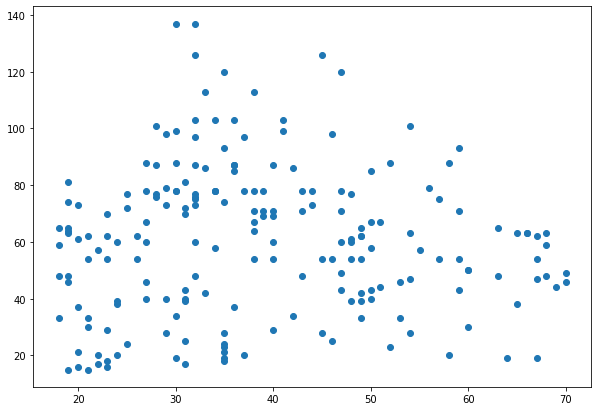

In [71]:
plt.figure(figsize=(10,7))
plt.scatter(datasubset[["Age"]],datasubset[['Annual Income (k$)']])

By looking at the data distribution we can see that we dont have much clusters or perticular group , so therefore lets plot a Dendrogram. 

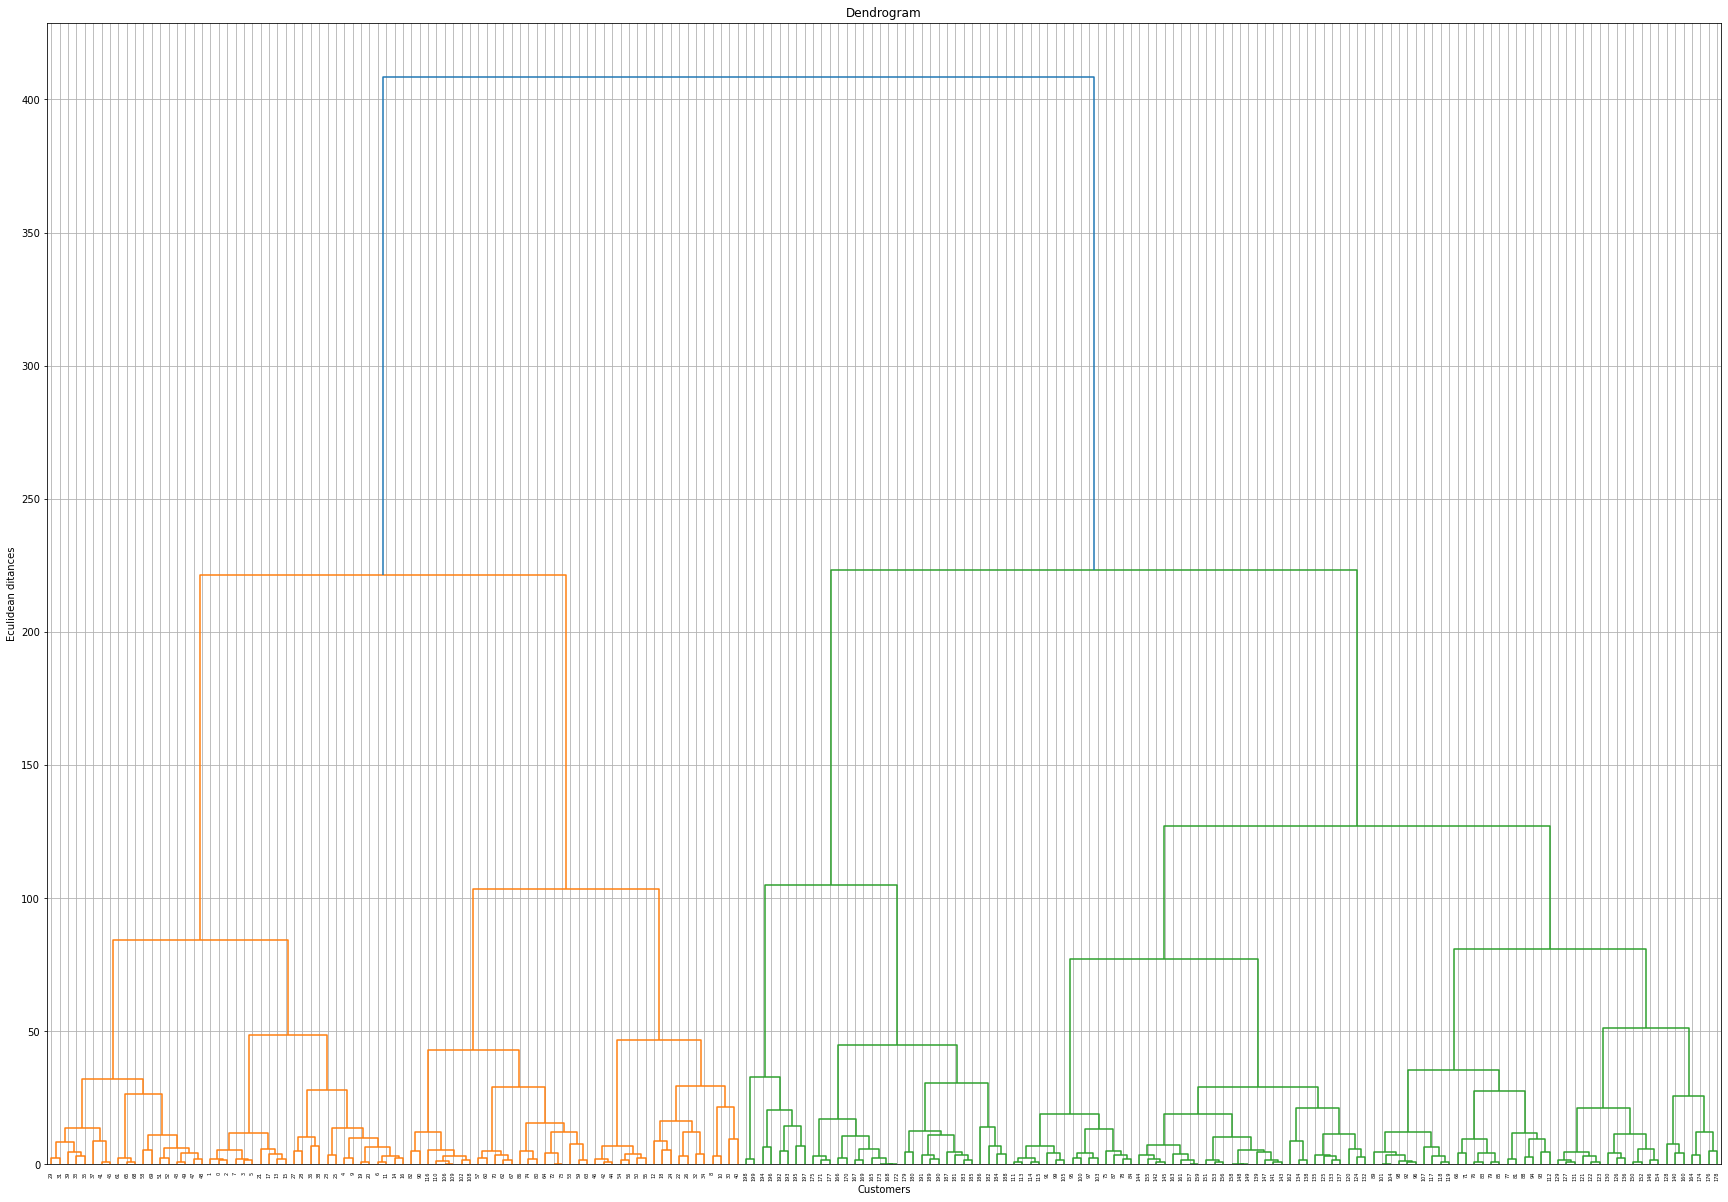

In [72]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(30,21))

dendrogram=sch.dendrogram(sch.linkage(datasubset,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eculidean ditances')
plt.grid()
plt.show()

# Lets check for the longest line from the bottom.

#here we can see the Dendrogram beautifully plotted the clusters accordingly, we can see and learn that the dendogram keeps on dividing the clustes until the single point of data, so each and every data point belongs to one or the other cluster.
here we can see that there are 2 mian clusters and followed by 4 clusters and so on.

# Hierarchical Clustering
It is most popular and widely used method to analyze social network.
It Groups and makes it easy for further model building 

Hierarchical Clustering is of "Two Types"
1.Agglomerative approach - Bottom up approach 
a.first merges closest clusters.
b.Updates the distance matrix
2.Divisive approach - top down approach ( Less widely used ) 
a.computes betwness for all links 
b.remove the link with the highest betweeness
c.Recompute betweenness for all remaining links
d.Go to b anb repeat until there is none.
( This is most time and processor consuming therefore mostly not used)



In [73]:
# Lets Perform Agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
# clusters given is 2 
# affinity or method is eucledean distance 
cluster.fit_predict(datasubset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Here we got 2 clusters as we can observe the data 1 and 0. 

In [74]:
cl = cluster.fit_predict(datasubset)
#here we are storing the above output or  cluster into variable called cl

Now lets check for Silhouette refers to a method of interpretation and validation of consistency within cluster of data or to show the goodness of a cluster.
a good Silhouette score is between [-1 to 1]
So lets check.

In [75]:
from sklearn.metrics import silhouette_score
silhouette_score(datasubset,cl)

0.4104652474372429

So as we predicted that the score is above -1 or less than 1 or 0.4 so this is not that good cluster.

In [76]:
x=datasubset.values # here we take two columns values of dictionary as a List format.
# This displays all the values in the dictionary

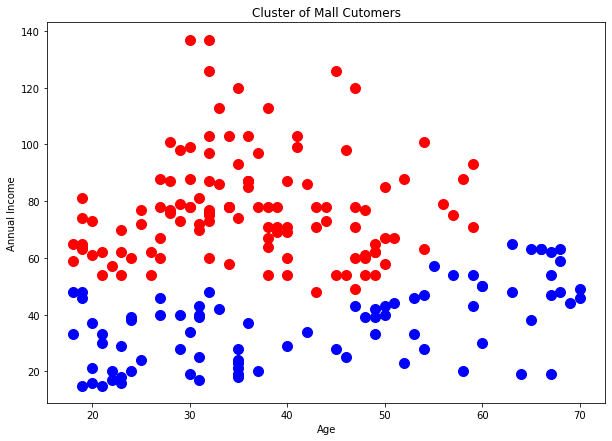

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(x[cl==0,0],x[cl==0,1], s=100,c='red',label='Cluster 1')
plt.scatter(x[cl==1,0],x[cl==1,1], s=100,c='blue',label='Cluster 2')
plt.title('Cluster of Mall Cutomers')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [77]:
#K-NearestNeighbors is usually used for Classificatio(most commonly) and also in regression.
#So lets apply KNN model
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2) # here we have didived datasets into 2 groups/clusters.
nbrs=neigh.fit(x)
distance, indices=nbrs.kneighbors(x)


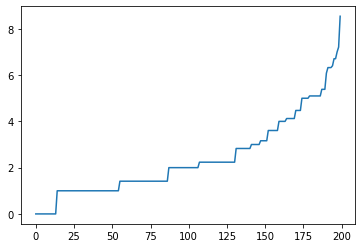

In [78]:
distance=np.sort(distance, axis=0)
distance=distance[:,1]
plt.plot(distance)

# DBSCAN
it is a clustering method that is used in ml to seprate cluster of high density from cluster of low density.
So lets perfrom this model.

In [79]:
from sklearn.cluster import DBSCAN
dbscancluster=DBSCAN(eps=7,min_samples=5)
dbscancluster.fit(x)
clusters=dbscancluster.labels_

In [80]:
len(set(clusters))
# so here we get 3 clusters , so lets plt some graph

3

In [81]:
silhouette_score(x,clusters)
#here we get only 0.28 which is not a good score so lets move on to another model

0.28705019416571775

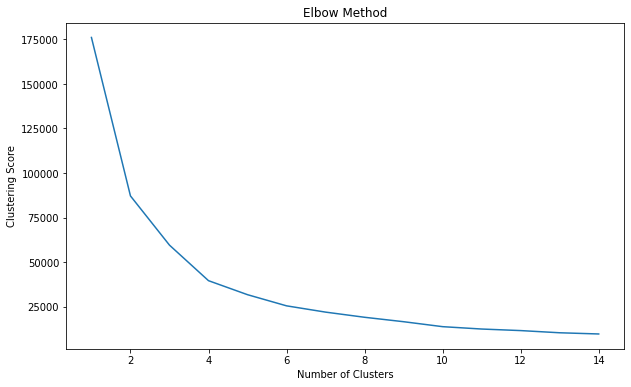

In [60]:
from sklearn.cluster import KMeans
# trying Kmeans
indivisual_clustering_score=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='random',random_state = 42)
    kmeans.fit(x)
    indivisual_clustering_score.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),indivisual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [82]:
# Lets fit this model and predict
kmeans=KMeans(n_clusters=2,random_state=42)

kmeans.fit(x)

pred=kmeans.predict(x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

so here we get 2 clusters and lets check the silhouette score

In [83]:
silhouette_score(x,pred)

0.42620850066216065

Still the score is not that good with this model.

Conclusion so we have performed Agglomerative/Hierarcial Clustering and even tested other methods, so we should always select the model with more cluster gap or distance in Clusters. 
please do perform more techniques and methods to make this more accurate and better. let me know and learn your methods too. 
Thank you 
Rohan Rajendra
r.rohanrajendra@gmail.com
7975870924